# <font color= "purple"><center>Classification avec decision tree</center></font>

A partir d'un dataset de sklearn, IRIS, utiliser et comprendre DecisionTreeClassifier.

<i><b>Astuce à avoir en tête en utilisant ce model :</b>
<ol>
<li>Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.</li>

<li>Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.</li>

<li>Understanding the decision tree structure will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.</li>

<li>Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.</li>

<li>Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.</li>

<li>Use min_samples_split or min_samples_leaf to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, min_samples_leaf=1 is often the best choice.</li>
    <a id=law7></a>
<li>Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.</li>

<li>If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.</li>

<li>All decision trees use np.float32 arrays internally. If training data is not in this format, a copy of the dataset will be made.</li>

<li>If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.</ol></i>

Petit cours
https://www.youtube.com/watch?v=gxS_R1Ph9ak&ab_channel=AIforyou-MorganGautherot


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

<i>default and min parameters :</i>
<li>criterion='gini'</li>
<li>splitter='best'</li>
<li>max_depth=None</li>
<li>min_samples_split=2</li>
<li>min_samples_leaf=1</li>
<li>min_weight_fraction_leaf=0.0</li>
<li>max_features=None</li>
<li>random_state=0</li>
<li>max_leaf_nodes=None</li>
<li>min_impurity_decrease=0.0</li>
<li>min_impurity_split=None</li>
<li>class_weight=None</li>
<li>presort='deprecated'</li>
<li>ccp_alpha=0.0</li>

In [2]:
criterion='gini'
splitter='best'
max_depth=None
min_samples_split=2
min_samples_leaf=1
min_weight_fraction_leaf=0.0
max_features=None
random_state=0
max_leaf_nodes=None
min_impurity_decrease=0.0
min_impurity_split=None
class_weight=None
presort='deprecated'
ccp_alpha=0.0

In [3]:
mclf_decisionTree = DecisionTreeClassifier(
    criterion=criterion,
    splitter=splitter,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_weight_fraction_leaf=min_weight_fraction_leaf,
    max_features=max_features,
    random_state=random_state,
    max_leaf_nodes=max_leaf_nodes,
    min_impurity_decrease=min_impurity_decrease,
    min_impurity_split=min_impurity_split,
    class_weight=class_weight,
    presort=presort,
    ccp_alpha=ccp_alpha
)

In [4]:
data, target = load_iris(return_X_y=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data_train, data_test, target_train, target_test = train_test_split(data, target,random_state=0, test_size=0.5)

In [7]:
mclf_decisionTree.fit(X=data_train, y=target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [8]:
mclf_decisionTree.score(data_test, target_test)

0.96

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
mclf_logisticRegression = LogisticRegression(verbose=1).fit(data_train, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [11]:
mclf_logisticRegression.score(data_test, target_test)

0.9333333333333333

Par défaut, le decision tree a un meilleur score avec, pour le `train_test_split` un `random_state=0` et un `test_size=0.5`
<li>mclf_decisionTree.score : <font color="green"><b> 0.96</b></font></li>
<li>mclf_logisticRegression.score : <font color="red"><b>0.9333333333333333</b></font></li>

In [23]:
from sklearn import metrics

In [33]:
def exhaustiveScore(model_classifier, X_train, X_test, y_test, y_train) :
    """
    Need import sklearn.metrics, print scores of classifier : 
    metrics used : 
        accuracy_score
        confusion_matrix
        classification_report
        accuracy_score
        confusion_matrix
        classification_report
        
    Parameters
    ----------
    @model_classifier : 
        Your classifier fitted.
        
    X_train, X_test, y_test, y_train : 
    !!!! DEFAULT : call them with the default values if you don't want to pass it as parameters !!!!!
        Your dataset splited. X = Data and y = Target
    """
    #To generate evaluation metrics
    print("Train - Accuracy :\n", metrics.accuracy_score(y_train, model_classifier.predict(X_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_train, model_classifier.predict(X_train)))
    print("Train - Classification report :\n",metrics.classification_report(y_train, model_classifier.predict(X_train)))
    print("\n")
    print("Test - Accuracy :\n", metrics.accuracy_score(y_test, model_classifier.predict(X_test)))
    print("Test - Confusion Matrix :\n", metrics.confusion_matrix(y_test, model_classifier.predict(X_test)))
    print("Test - Classification report :\n", metrics.classification_report(y_test, model_classifier.predict(X_test)))

In [12]:
from sklearn.tree import plot_tree # pour afficher un arbre de décision

In [13]:
from matplotlib import pyplot as plt

In [14]:
features = load_iris().feature_names
target_names = load_iris().target_names

Paramètres de plot_tree :
<ol>
    <li>decision_tree,</li>
    <li>max_depth=None,</li>
    <li>feature_names=None,</li>
    <li>class_names=None,</li>
    <li>label='all',</li>
    <li>filled=False,</li>
    <li>impurity=True,</li>
    <li>node_ids=False,</li>
    <li>proportion=False,</li>
    <li>rotate=False,</li>
    <li>rounded=False,</li>
    <li>precision=3,</li>
    <li>ax=None,</li>
    <li>fontsize=None</li>
    </ol>
    

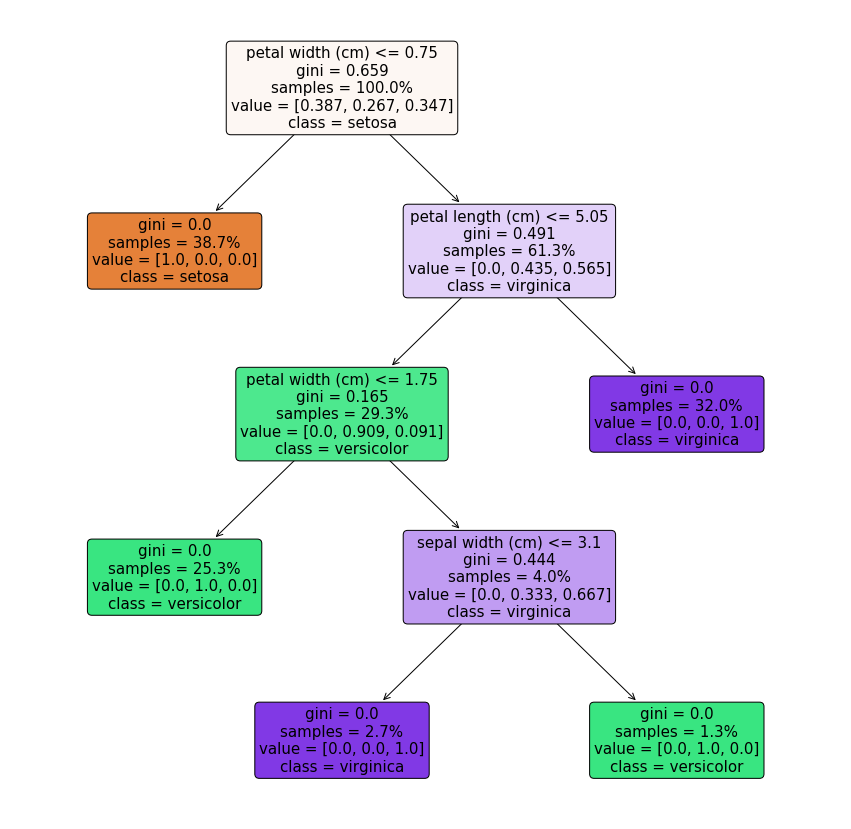

In [19]:
plt.figure(figsize=(15,15))
plot_tree(
    mclf_decisionTree,
    filled=True,
    rounded=True,
    label='all',
    fontsize=15,
    class_names=target_names,
    proportion=True,
    feature_names= features
)
plt.show() 

In [16]:
from sklearn.tree import export_text

In [17]:
print(export_text(mclf_decisionTree, feature_names=features, show_weights=True))

|--- petal width (cm) <= 0.75
|   |--- weights: [29.00, 0.00, 0.00] class: 0
|--- petal width (cm) >  0.75
|   |--- petal length (cm) <= 5.05
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- weights: [0.00, 19.00, 0.00] class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- weights: [0.00, 0.00, 24.00] class: 2



A noter que ces résultats changent significativement quand on varier le train_test_split. 

Le score va varier, les models entrent en concurrence, l'un ayant un meilleur score que l'autre.
L'arbre change.

Enfin avec un test_split de 0,2, les deux models sont à 1.

Il me reste à trouver comment faire un train_test_split qui conserve des groupes égaux pour entrainer le modèle et respecter la loi numéro 7 évoquée en début de [I - document](#law7)

In [32]:
exhaustiveScore(mclf_decisionTree)

Train - Accuracy :
 1.0
Train - Confusion matrix :
 [[29  0  0]
 [ 0 20  0]
 [ 0  0 26]]
Train - Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        26

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



Test - Accuracy :
 0.96
Test - Confusion Matrix :
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
Test - Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96      

In [38]:
import pandas as pd

In [39]:
df_data_train = pd.DataFrame(data_train, columns=features)

In [40]:
df_data_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.6,3.1,1.5,0.2
1,5.9,3.0,5.1,1.8
2,5.1,2.5,3.0,1.1
3,4.6,3.4,1.4,0.3
4,6.2,2.2,4.5,1.5
...,...,...,...,...
70,4.9,3.1,1.5,0.1
71,6.3,2.9,5.6,1.8
72,5.8,2.7,4.1,1.0
73,7.7,3.8,6.7,2.2


In [46]:
len(df_data_train.columns)

4

In [63]:

df_data_train.columns[:]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [64]:
len(df_data_train.columns[:])

4

In [77]:
df_data_train.columns[0]


'sepal length (cm)'

In [65]:

index= len(df_data_train.columns[:])
for n in range(index):
    print(n)

0
1
2
3


In [ ]:
for n in range(index):
        meanS=[] # list of means
        for i in listeN:
            meanS.append(df_data_train.iloc[:,n].loc[df_data_train.iloc[:,0]==i].mean())
        plt.bar(ind, meanS, width, bottom=bot)
        if type(bot)is int:
            bot=np.array(meanS)
        else:
            bot=bot+np.array(meanS)
    plt.xticks(ind,listeN)
    plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Salt', 'Proteins','Fat','Sugar'))
    plt.title('Evolution des teneurs nutritives en fonction du nutriscore', fontsize=15, color="blue")

In [ ]:
def empiledBarPlot(dataframe) :
    plt.figure(figsize=[15,10])
    index= dataframe.columns[:1,]
    labels=dataframe
    N=5
    bot= 0
    width= 0.35
    ind=[1,2,3,4,5]
    for n in range(index):
        meanS=[] # list of means
        for i in listeN:
            meanS.append(dataframe.iloc[:,n].loc[dataframe.iloc[:,0]==i].mean())
        plt.bar(ind, meanS, width, bottom=bot)
        if type(bot)is int:
            bot=np.array(meanS)
        else:
            bot=bot+np.array(meanS)
    plt.xticks(ind,listeN)
    plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Salt', 'Proteins','Fat','Sugar'))
    plt.title('Evolution des teneurs nutritives en fonction du nutriscore', fontsize=15, color="blue")

In [ ]:
plt.figure(figsize=[15,10])
index= [1,2,3,4]
listeN=['a','b','c','d','e']
N=5
bot= 0
width= 0.35
ind=[1,2,3,4,5]
for n in index:
    meanS=[]# list of means
    for i in listeN:
        meanS.append(Xu.iloc[:,n].loc[Xu.iloc[:,0]==i].mean())
    plt.bar(ind, meanS, width, bottom=bot)
    if type(bot)is int:
        bot=np.array(meanS)
    else:
        bot=bot+np.array(meanS)
plt.xticks(ind,listeN)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Salt', 'Proteins','Fat','Sugar'))
plt.title('Evolution des teneurs nutritives en fonction du nutriscore', fontsize=15, color="blue")